In [9]:
!pip install chart_studio
!pip install plotly --upgrade

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import plotly.graph_objects as go
import numpy as np
import plotly.express as px

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import chart_studio
chart_studio.tools.set_credentials_file(username='PhilippeAU', api_key='DMtKjHJgwBsH72hvPxdr')

In [38]:
import plotly.graph_objs as go
import chart_studio.plotly as py
from chart_studio import tools
import plotly.tools as tls

In [ ]:
data = pd.read_csv("/content/titles.csv")
data.head()

In [ ]:
data['release_year'] = data['release_year'].astype(int)
data['release_year'].dtype

In [12]:
df = pd.DataFrame(data)

In [ ]:
df = df.drop(['id','imdb_id','imdb_votes','tmdb_popularity','tmdb_score'], axis=1)
df.head(5)

In [ ]:
df.isna().sum()

In [ ]:
data = data.dropna(subset=['description', 'age_certification','seasons','imdb_id','imdb_score','imdb_votes','tmdb_popularity','tmdb_score'], axis=0)
data = data.reset_index(drop=True)
data.isna().sum()

In [17]:
GenreTotalFilm = data['tmdb_popularity'].groupby(data['genres']).sum().sort_values(ascending=False).to_frame()

fig = go.Figure(data=[go.Pie(labels=GenreTotalFilm.index,
                             values=GenreTotalFilm['tmdb_popularity'], opacity=0.9, textinfo='none')])
fig.update_traces(marker=dict(line=dict(color='#000000', width=0.5)))
fig.update_layout(title_text='Distribuição de filmes por gênero',
                  title_x=0.5, title_font=dict(size=10))
fig.show()
py.plot(fig, filename = 'Distribuição de filmes por gênero')

'https://plotly.com/~PhilippeAU/3/'

In [18]:
GenreTotalFilm = data['release_year'].groupby(data['production_countries']).sum().sort_values(ascending=False).to_frame()

fig = go.Figure(data=[go.Pie(labels=GenreTotalFilm.index,
                             values=GenreTotalFilm['release_year'], opacity=0.9, textinfo='none')])
fig.update_traces(marker=dict(line=dict(color='#000000', width=0.5)))
fig.update_layout(title_text='Paises que mais criam filmes',
                  title_x=0.5, title_font=dict(size=10))
fig.show()
py.plot(fig, filename = 'Paises que mais criam filmes')

'https://plotly.com/~PhilippeAU/5/'

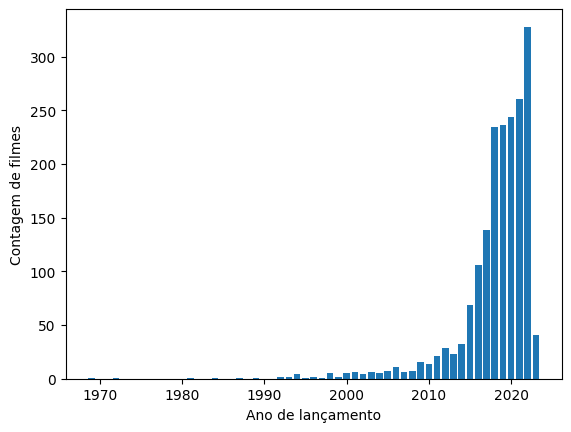

ValueError: ignored

In [53]:
year_counts = data['release_year'].value_counts().sort_index()

# Cria o gráfico de barras com Matplotlib
plt.bar(year_counts.index, year_counts.values)

# Define os rótulos dos eixos
plt.xlabel('Ano de lançamento')
plt.ylabel('Contagem de filmes')

# Mostra o gráfico no Colab
plt.show()

# Converte o gráfico Matplotlib em um objeto gráfico Plotly
plotly_fig = tls.mpl_to_plotly(plt.gcf())

# Envia o gráfico para o Chart Studio
py.plot(plotly_fig, filename='Contagem de filmes por ano de lançamento')

In [24]:


title_scores = data[['title', 'imdb_score']]


title_scores = title_scores.nlargest(20, 'imdb_score')


fig = go.Figure(data=[go.Bar(x=title_scores['title'],
                             y=title_scores['imdb_score'],
                             marker_color='rgb(26, 118, 255)')])


fig.update_layout(title='Top 20 Filmes e séries com as Maiores Notas no IMDb',
                  xaxis_title='Nome do Filme',
                  yaxis_title='Nota no IMDb',
                  plot_bgcolor='rgba(0,0,0,0)')


fig.show()
py.plot(fig, filename = 'Top 20 Filmes e séries com as Maiores Notas no IMDb')

'https://plotly.com/~PhilippeAU/10/'

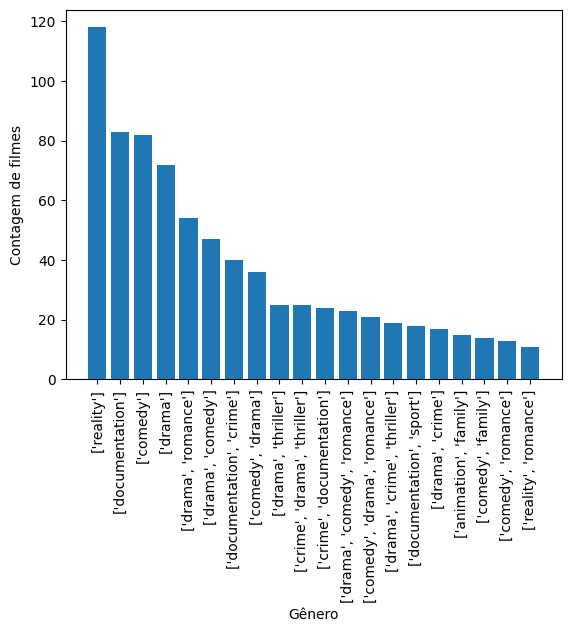

/usr/local/lib/python3.9/dist-packages/plotly/matplotlylib/renderer.py:647: UserWarning:

Looks like the annotation(s) you are trying 
to draw lies/lay outside the given figure size.

Therefore, the resulting Plotly figure may not be 
large enough to view the full text. To adjust 
the size of the figure, use the 'width' and 
'height' keys in the Layout object. Alternatively,
use the Margin object to adjust the figure's margins.



'https://plotly.com/~PhilippeAU/28/'

In [48]:
genre_counts = data['genres'].value_counts().head(20)

# Cria o gráfico de barras com Matplotlib
fig, ax = plt.subplots()
ax.bar(genre_counts.index, genre_counts.values)

# Rotaciona os rótulos dos eixos x em 90 graus
plt.xticks(rotation=90)

# Define os rótulos dos eixos
plt.xlabel('Gênero')
plt.ylabel('Contagem de filmes')

# Mostra o gráfico no Colab
plt.show()

# Converte o gráfico Matplotlib em um objeto gráfico Plotly
plotly_fig = tls.mpl_to_plotly(fig)

# Envia o gráfico para o Chart Studio
py.plot(plotly_fig, filename='Contagem de filmes por gênero')

In [34]:
AnnualNumberOffilm = data['release_year'].groupby(data['release_year']).count()

fig = px.bar(AnnualNumberOffilm , x=AnnualNumberOffilm .index, y=AnnualNumberOffilm ,
              labels={
                  "index": "release_year",
                  "y": "Number of Games Published"
              }
              )
fig.update_layout(title_text='Número de filmes publicados anualmente',
                  title_x=0.5, title_font=dict(size=24))

fig.show()
py.plot(fig, filename = 'Numero de filmes publicados anualmente')

'https://plotly.com/~PhilippeAU/12/'

In [ ]:
print(df.columns)

Index(['title', 'type', 'description', 'release_year', 'age_certification',
       'runtime', 'genres', 'production_countries', 'seasons', 'imdb_score'],
      dtype='object')


In [42]:
top_developer_sales = data.loc[data.groupby('production_countries')['release_year'].idxmax()]
top_developer_sales = top_developer_sales.sort_values(by='release_year', ascending=False).nlargest(105, 'release_year')

fig = px.bar(top_developer_sales, x='production_countries', y='release_year', color='title',
             labels={
                 "production_countries": "production_countries",
                 "release_year": "release_year"
             },
             title="Paises e seus filmes",
             template='ggplot2')

fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()
py.plot(fig, filename = 'Paises e seus filmes')

'https://plotly.com/~PhilippeAU/14/'

In [41]:
yearCount = data.groupby(pd.Grouper(key='release_year')).size().reset_index(name='count')
fig = px.treemap(yearCount, path=['release_year'], values='count')
fig.update_layout(title_text='Quantidade de filmes por ano',
                  title_x=0.5, title_font=dict(size=22)
                  )
fig.update_traces(textinfo="label+value")
fig.show()
py.plot(fig, filename = 'Quantidade de filmes por ano')

'https://plotly.com/~PhilippeAU/16/'

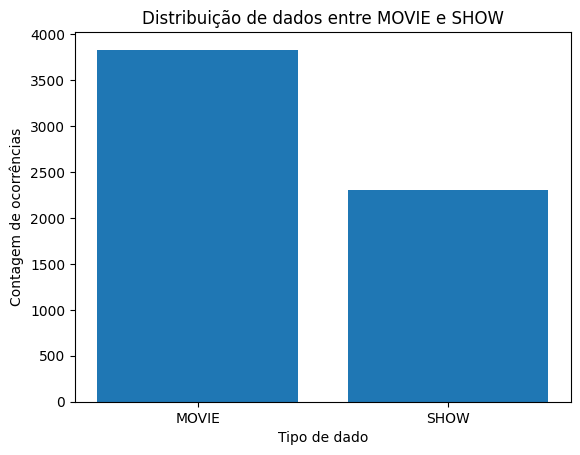

'https://plotly.com/~PhilippeAU/18/'

In [49]:
movie_data = df[df['type'] == 'MOVIE']
show_data = df[df['type'] == 'SHOW']

movie_counts = movie_data['type'].count()
show_counts = show_data['type'].count()

# Criação do gráfico com Matplotlib
fig, ax = plt.subplots()
ax.bar(['MOVIE', 'SHOW'], [movie_counts, show_counts])

plt.title('Distribuição de dados entre MOVIE e SHOW')
plt.xlabel('Tipo de dado')
plt.ylabel('Contagem de ocorrências')

# Conversão do gráfico Matplotlib em um objeto gráfico Plotly
plt.show()

# Converte o gráfico Matplotlib em um objeto gráfico Plotly
plotly_fig = tls.mpl_to_plotly(fig)

# Envia o gráfico para o Chart Studio
py.plot(plotly_fig, filename='Distribuição de dados entre MOVIE e SHOW')